In [87]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import pickle
import warnings
warnings.filterwarnings("ignore")
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor,AdaBoostRegressor,ExtraTreesRegressor
from sklearn.svm import SVR

In [88]:
df=pd.read_csv('laptop_data.csv')
df.head()

,Unnamed: 0,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080


In [89]:
df.shape

(1303, 12)

In [90]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        1303 non-null   int64  
 1   Company           1303 non-null   object 
 2   TypeName          1303 non-null   object 
 3   Inches            1303 non-null   float64
 4   ScreenResolution  1303 non-null   object 
 5   Cpu               1303 non-null   object 
 6   Ram               1303 non-null   object 
 7   Memory            1303 non-null   object 
 8   Gpu               1303 non-null   object 
 9   OpSys             1303 non-null   object 
 10  Weight            1303 non-null   object 
 11  Price             1303 non-null   float64
dtypes: float64(2), int64(1), object(9)
memory usage: 122.3+ KB


In [91]:
df.isnull().sum()

Unnamed: 0          0
Company             0
TypeName            0
Inches              0
ScreenResolution    0
Cpu                 0
Ram                 0
Memory              0
Gpu                 0
OpSys               0
Weight              0
Price               0
dtype: int64

In [92]:
df.duplicated().sum()

0

In [93]:
df.drop('Unnamed: 0',axis=1,inplace=True)

In [94]:
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080


In [95]:
df['Ram'] = df['Ram'].str.replace('GB','')
df['Weight'] = df['Weight'].str.replace('kg','')

In [96]:
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080


In [97]:
print(df['Ram'].dtype)
print(df['Weight'].dtype)

object
object


In [98]:
df['Ram']=df['Ram'].astype('int32')
df['Weight']=df['Weight'].astype('float32')

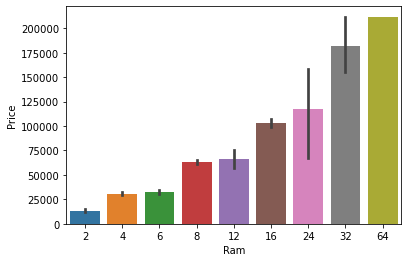

In [99]:
sns.barplot(df['Ram'],df['Price'])
plt.show()
# By change in Ram size, the price varies

In [100]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1303 non-null   object 
 1   TypeName          1303 non-null   object 
 2   Inches            1303 non-null   float64
 3   ScreenResolution  1303 non-null   object 
 4   Cpu               1303 non-null   object 
 5   Ram               1303 non-null   int32  
 6   Memory            1303 non-null   object 
 7   Gpu               1303 non-null   object 
 8   OpSys             1303 non-null   object 
 9   Weight            1303 non-null   float32
 10  Price             1303 non-null   float64
dtypes: float32(1), float64(2), int32(1), object(7)
memory usage: 101.9+ KB


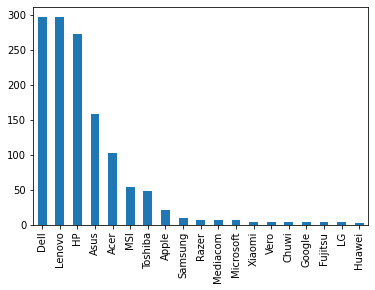

In [101]:
df['Company'].value_counts().plot(kind='bar')
plt.show()
# Mostly we have laptop of dell, lenovo and hp

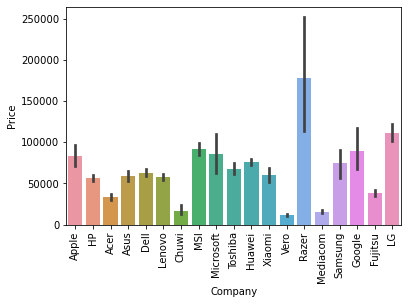

In [102]:
sns.barplot(x=df['Company'],y=df['Price'])
plt.xticks(rotation='vertical')
plt.show()
# Razer have most expensive laptops
# laptop price alse depends upon what type of company we choose

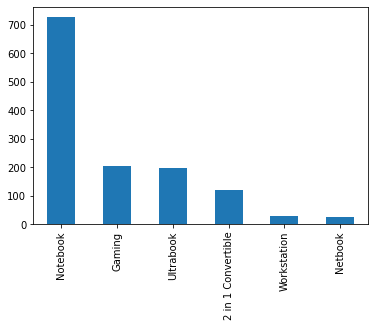

In [103]:
df['TypeName'].value_counts().plot(kind='bar')
plt.show()
# Mostly we have notebook laptops

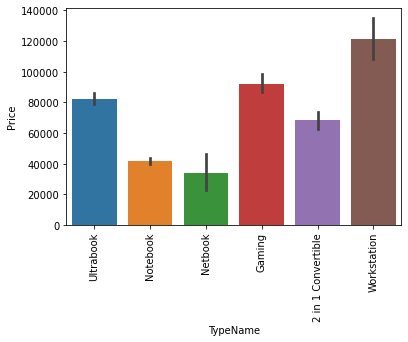

In [104]:
sns.barplot(x=df['TypeName'],y=df['Price'])
plt.xticks(rotation='vertical')
plt.show()
# Workstation type laptops are most expensive
# laptop price also depends upon on type of laptop

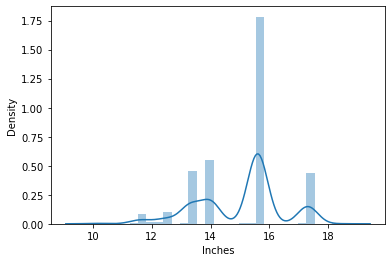

In [105]:
sns.distplot(df['Inches'])
plt.show()
# Mostly laptops are of 16 inches

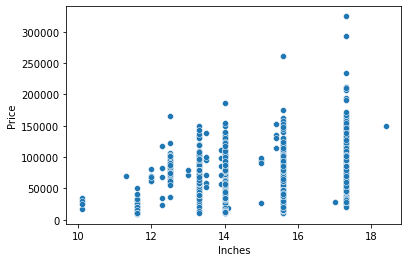

In [106]:
sns.scatterplot(df['Inches'],df['Price'])
plt.show()
# With the increase in icnhes, laptop prices also increases

In [107]:
df['ScreenResolution'].value_counts()

Full HD 1920x1080                                507
1366x768                                         281
IPS Panel Full HD 1920x1080                      230
IPS Panel Full HD / Touchscreen 1920x1080         53
Full HD / Touchscreen 1920x1080                   47
1600x900                                          23
Touchscreen 1366x768                              16
Quad HD+ / Touchscreen 3200x1800                  15
IPS Panel 4K Ultra HD 3840x2160                   12
IPS Panel 4K Ultra HD / Touchscreen 3840x2160     11
4K Ultra HD / Touchscreen 3840x2160               10
4K Ultra HD 3840x2160                              7
Touchscreen 2560x1440                              7
IPS Panel 1366x768                                 7
IPS Panel Quad HD+ / Touchscreen 3200x1800         6
IPS Panel Retina Display 2560x1600                 6
IPS Panel Retina Display 2304x1440                 6
Touchscreen 2256x1504                              6
IPS Panel Touchscreen 2560x1440               

In [108]:
df['Ips']=df['ScreenResolution'].apply(lambda x:1 if 'IPS Panel' in x else 0)

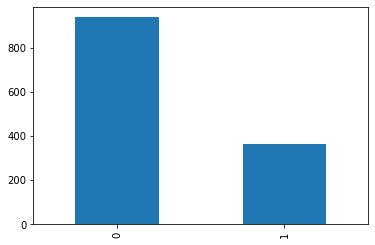

In [109]:
df['Ips'].value_counts().plot(kind='bar')
plt.show()
# Mostly laptops have no IPS Panel

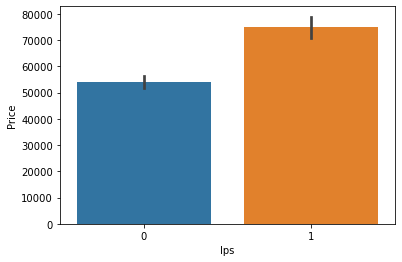

In [110]:
sns.barplot(df['Ips'],df['Price'])
plt.show()
# IPS Panel laptops have high price

In [111]:
df['Touchscreen']=df['ScreenResolution'].apply(lambda x:1 if 'Touchscreen' in x else 0)

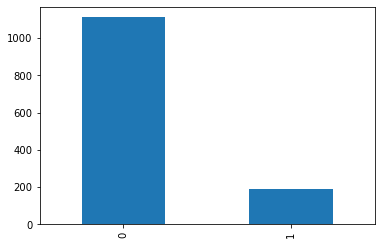

In [112]:
df['Touchscreen'].value_counts().plot(kind='bar')
plt.show()
# Mostly laptops have no touchscreen

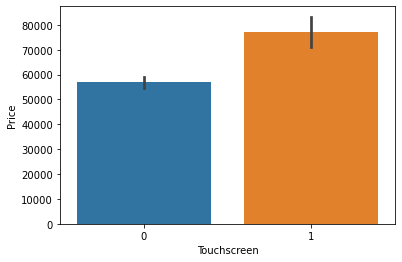

In [113]:
sns.barplot(df['Touchscreen'],df['Price'])
plt.show()
# Touch Screen laptops have high price

In [114]:
res=df['ScreenResolution'].str.split('x')

In [115]:
df['X_res']=0
df['Y_res']=0
for i in range(len(res)):
    df['Y_res'][i]=res[i][1]
    df['X_res'][i]=res[i][0][-4:]

In [116]:
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Ips,Touchscreen,X_res,Y_res
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,1,0,2560,1600
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,1440,900
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,1920,1080
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,1,0,2880,1800
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,1,0,2560,1600


In [117]:
df['X_res']=df['X_res'].astype('int32')
df['Y_res']=df['Y_res'].astype('int32')

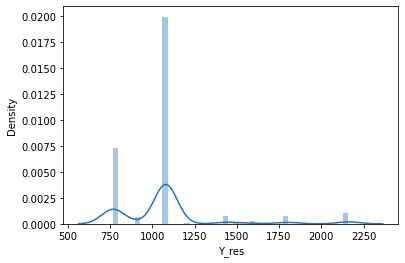

In [118]:
sns.distplot(df['Y_res'])
plt.show()

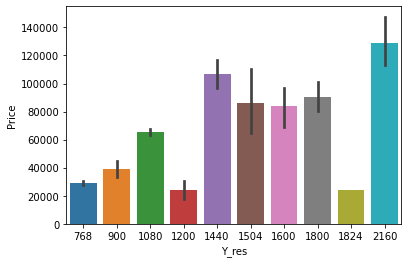

In [119]:
sns.barplot(x=df['Y_res'],y=df['Price'])
plt.show()

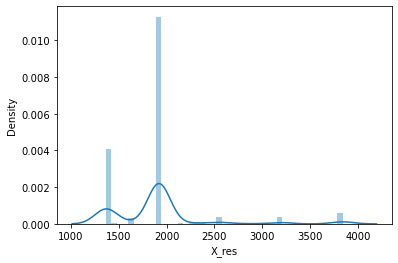

In [120]:
sns.distplot(df['X_res'])
plt.show()

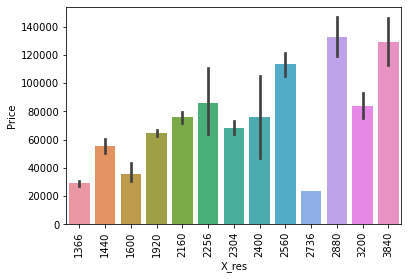

In [121]:
sns.barplot(x=df['X_res'],y=df['Price'])
plt.xticks(rotation='vertical')
plt.show()

In [122]:
df.corr()['Price']

Inches         0.068197
Ram            0.743007
Weight         0.210370
Price          1.000000
Ips            0.252208
Touchscreen    0.191226
X_res          0.556529
Y_res          0.552809
Name: Price, dtype: float64

In [123]:
df['ppi'] = (((df['X_res']**2) + (df['Y_res']**2))**0.5)/df['Inches'].astype('float')
df.corr()['Price']
# Having strong corelation of ppi with price

Inches         0.068197
Ram            0.743007
Weight         0.210370
Price          1.000000
Ips            0.252208
Touchscreen    0.191226
X_res          0.556529
Y_res          0.552809
ppi            0.473487
Name: Price, dtype: float64

In [124]:
df.drop(['ScreenResolution','X_res','Y_res','Inches'],axis=1,inplace=True)

In [125]:
df.head()

,Company,TypeName,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Ips,Touchscreen,ppi
0,Apple,Ultrabook,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,1,0,226.983005
1,Apple,Ultrabook,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940
2,HP,Notebook,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998
3,Apple,Ultrabook,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,1,0,220.534624
4,Apple,Ultrabook,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,1,0,226.983005


In [126]:
df['Cpu Brand']=df['Cpu']
for i,j in zip(range(len(df['Cpu'])),df['Cpu']):
    if 'Intel Core i3' in j:
        df['Cpu Brand'][i]='Intel Core i3'
    elif 'Intel Core i5' in j:
        df['Cpu Brand'][i]='Intel Core i5'
    elif 'Intel Core i7' in j:
        df['Cpu Brand'][i]='Intel Core i7'
    elif 'AMD' in j:
        df['Cpu Brand'][i]='AMD'
    else:
        df['Cpu Brand'][i]='Other Processor'

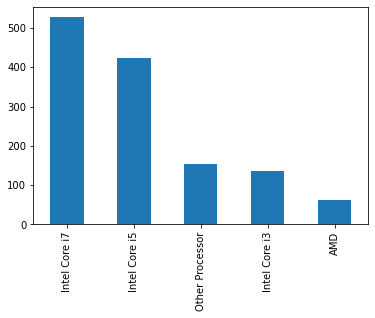

In [127]:
df['Cpu Brand'].value_counts().plot(kind='bar')
plt.show()

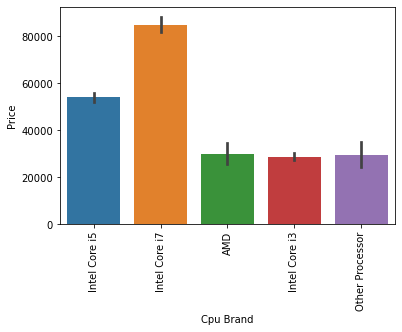

In [128]:
sns.barplot(x=df['Cpu Brand'],y=df['Price'])
plt.xticks(rotation='vertical')
plt.show()

In [129]:
df.drop('Cpu',axis=1,inplace=True)

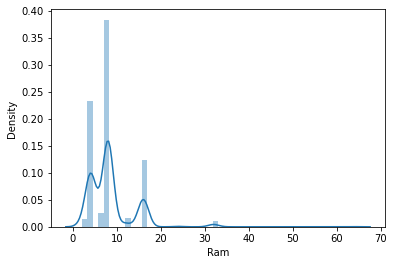

In [130]:
sns.distplot(df['Ram'])
plt.show()

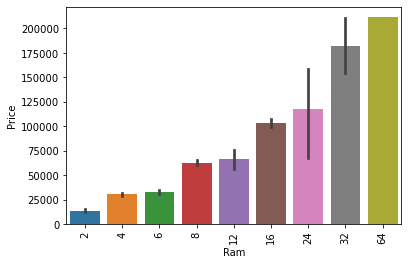

In [131]:
sns.barplot(x=df['Ram'],y=df['Price'])
plt.xticks(rotation='vertical')
plt.show()

In [132]:
df['Memory'].value_counts()

256GB SSD                        412
1TB HDD                          223
500GB HDD                        132
512GB SSD                        118
128GB SSD +  1TB HDD              94
128GB SSD                         76
256GB SSD +  1TB HDD              73
32GB Flash Storage                38
2TB HDD                           16
64GB Flash Storage                15
512GB SSD +  1TB HDD              14
1TB SSD                           14
256GB SSD +  2TB HDD              10
1.0TB Hybrid                       9
256GB Flash Storage                8
16GB Flash Storage                 7
32GB SSD                           6
180GB SSD                          5
128GB Flash Storage                4
512GB SSD +  2TB HDD               3
16GB SSD                           3
512GB Flash Storage                2
1TB SSD +  1TB HDD                 2
256GB SSD +  500GB HDD             2
128GB SSD +  2TB HDD               2
256GB SSD +  256GB SSD             2
512GB SSD +  256GB SSD             1
5

In [133]:
df['SSD']=0
df['HDD']=0
df['Hybrid']=0
df['Flash Storage']=0
df['Memory']=df['Memory'].str.replace('1TB','1000GB')
df['Memory']=df['Memory'].str.replace('1.0TB','1000GB')
df['Memory']=df['Memory'].str.replace('2.0TB','2000GB')
df['Memory']=df['Memory'].str.replace('2TB','2000GB')
for i in range(len(df)):
    a=df['Memory'][i].split('+')
    b=a[0].split('GB')
    if 'SSD' in a[0]:
        df['SSD'][i]=b[0]
    elif 'HDD' in a[0]:
        df['HDD'][i]=b[0]
    elif 'Hybrid' in a[0]:
        df['Hybrid'][i]=b[0]
    elif 'Flash Storage' in a[0]:
        df['Flash Storage'][i]=b[0]
    if '+'in df['Memory'][i]:
        c=a[1].split('GB')
        if 'SSD' in a[1]:
            df['SSD'][i]=int(df['SSD'][i])+int(c[0])
        elif 'HDD' in a[1]:
            df['HDD'][i]=int(df['HDD'][i])+int(c[0])
        elif 'Hybrid' in a[1]:
            df['Hybrid'][i]=int(df['Hybrid'][i])+int(c[0])
        elif 'Flash Storage' in a[1]:
            df['Flash Storage'][i]=int(df['Flash Storage'][i])+int(c[0])

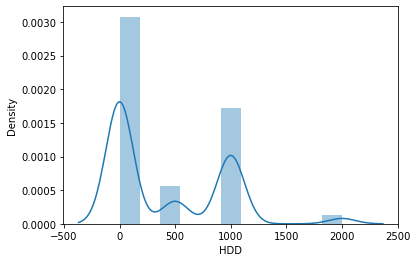

In [134]:
sns.distplot(df['HDD'])
plt.show()

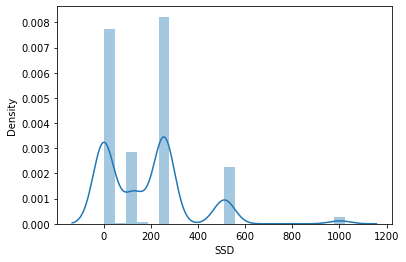

In [135]:
sns.distplot(df['SSD'])
plt.show()

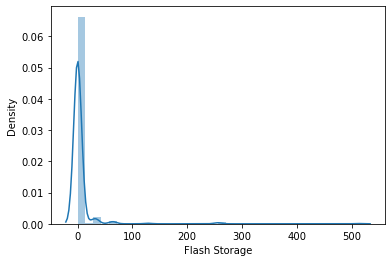

In [136]:
sns.distplot(df['Flash Storage'])
plt.show()

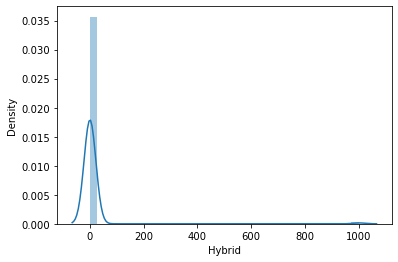

In [137]:
sns.distplot(df['Hybrid'])
plt.show()

In [138]:
df.drop('Memory',axis=1,inplace=True)

In [139]:
df.corr()['Price']

Ram              0.743007
Weight           0.210370
Price            1.000000
Ips              0.252208
Touchscreen      0.191226
ppi              0.473487
SSD              0.670799
HDD             -0.096441
Hybrid           0.007989
Flash Storage   -0.040511
Name: Price, dtype: float64

In [140]:
df['Hybrid'].value_counts()

0       1291
1000      11
508        1
Name: Hybrid, dtype: int64

In [141]:
df['Flash Storage'].value_counts()

0      1228
32       38
64       16
256       8
16        7
128       4
512       2
Name: Flash Storage, dtype: int64

In [142]:
df.drop(['Hybrid','Flash Storage'],axis=1,inplace=True)

In [143]:
df.head()

,Company,TypeName,Ram,Gpu,OpSys,Weight,Price,Ips,Touchscreen,ppi,Cpu Brand,SSD,HDD
0,Apple,Ultrabook,8,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,1,0,226.983005,Intel Core i5,128,0
1,Apple,Ultrabook,8,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5,0,0
2,HP,Notebook,8,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5,256,0
3,Apple,Ultrabook,16,AMD Radeon Pro 455,macOS,1.83,135195.3360,1,0,220.534624,Intel Core i7,512,0
4,Apple,Ultrabook,8,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,1,0,226.983005,Intel Core i5,256,0


In [144]:
df['Gpu Brand']=0
for i in range(len(df['Gpu'])):
    df['Gpu Brand'][i]=df['Gpu'][i].split(' ')[0]

In [145]:
df=df[df['Gpu Brand']!='ARM']
df.reset_index(inplace=True)

In [146]:
df.drop('Gpu',axis=1,inplace=True)
df.head()

,index,Company,TypeName,Ram,OpSys,Weight,Price,Ips,Touchscreen,ppi,Cpu Brand,SSD,HDD,Gpu Brand
0,0,Apple,Ultrabook,8,macOS,1.37,71378.6832,1,0,226.983005,Intel Core i5,128,0,Intel
1,1,Apple,Ultrabook,8,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5,0,0,Intel
2,2,HP,Notebook,8,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5,256,0,Intel
3,3,Apple,Ultrabook,16,macOS,1.83,135195.3360,1,0,220.534624,Intel Core i7,512,0,AMD
4,4,Apple,Ultrabook,8,macOS,1.37,96095.8080,1,0,226.983005,Intel Core i5,256,0,Intel


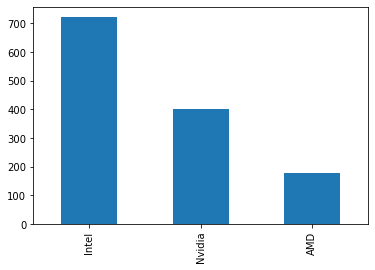

In [147]:
df['Gpu Brand'].value_counts().plot(kind='bar')
plt.show()

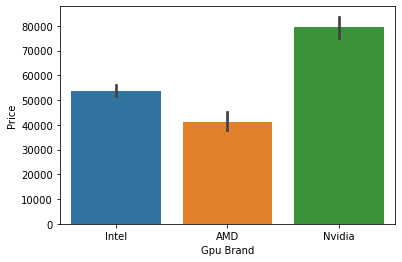

In [148]:
sns.barplot(df['Gpu Brand'],df['Price'])
plt.show()

In [149]:
df['OpSys'].value_counts()

Windows 10      1072
No OS             66
Linux             62
Windows 7         45
Chrome OS         26
macOS             13
Mac OS X           8
Windows 10 S       8
Android            2
Name: OpSys, dtype: int64

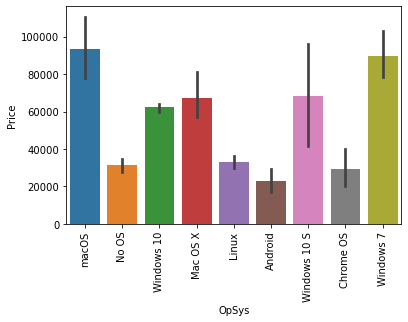

In [150]:
sns.barplot(df['OpSys'],df['Price'])
plt.xticks(rotation='vertical')
plt.show()

In [151]:
df['OS']=0
for i in range(len(df['OpSys'])):
    if 'Windows' in df['OpSys'][i]:
        df['OS'][i]='Windows'
    elif 'mac' in df['OpSys'][i]:
        df['OS'][i]='Mac'
    elif 'Mac' in df['OpSys'][i]:
        df['OS'][i]='Mac'
    else:
        df['OS'][i]='Others/No Linus/No OS'

In [152]:
df.drop(columns=['OpSys'],inplace=True)

In [153]:
df.head()

,index,Company,TypeName,Ram,Weight,Price,Ips,Touchscreen,ppi,Cpu Brand,SSD,HDD,Gpu Brand,OS
0,0,Apple,Ultrabook,8,1.37,71378.6832,1,0,226.983005,Intel Core i5,128,0,Intel,Mac
1,1,Apple,Ultrabook,8,1.34,47895.5232,0,0,127.677940,Intel Core i5,0,0,Intel,Mac
2,2,HP,Notebook,8,1.86,30636.0000,0,0,141.211998,Intel Core i5,256,0,Intel,Others/No Linus/No OS
3,3,Apple,Ultrabook,16,1.83,135195.3360,1,0,220.534624,Intel Core i7,512,0,AMD,Mac
4,4,Apple,Ultrabook,8,1.37,96095.8080,1,0,226.983005,Intel Core i5,256,0,Intel,Mac


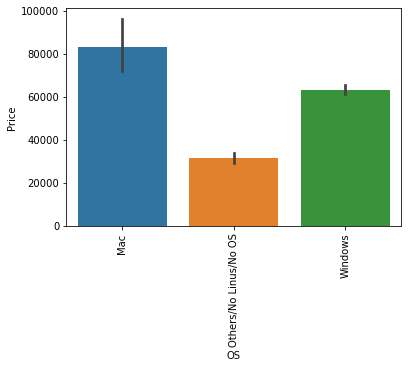

In [154]:
sns.barplot(x=df['OS'],y=df['Price'])
plt.xticks(rotation='vertical')
plt.show()

In [155]:
df['OS'].value_counts()

Windows                  1125
Others/No Linus/No OS     156
Mac                        21
Name: OS, dtype: int64

In [156]:
df.corr()['Price']

index          0.068784
Ram            0.742905
Weight         0.209867
Price          1.000000
Ips            0.253320
Touchscreen    0.192917
ppi            0.475368
SSD            0.670660
HDD           -0.096891
Name: Price, dtype: float64

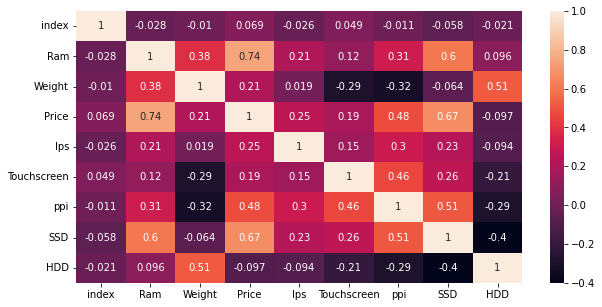

In [157]:
plt.figure(figsize=(10,5))
sns.heatmap(df.corr(),annot=True)
plt.show()

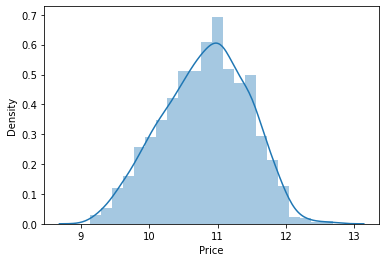

In [158]:
sns.distplot(np.log(df['Price']))
plt.show()

In [159]:
df['Price']=np.log(df['Price'])

In [160]:
df.drop('index',axis=1,inplace=True)

In [161]:
df.head()

,Company,TypeName,Ram,Weight,Price,Ips,Touchscreen,ppi,Cpu Brand,SSD,HDD,Gpu Brand,OS
0,Apple,Ultrabook,8,1.37,11.175755,1,0,226.983005,Intel Core i5,128,0,Intel,Mac
1,Apple,Ultrabook,8,1.34,10.776777,0,0,127.677940,Intel Core i5,0,0,Intel,Mac
2,HP,Notebook,8,1.86,10.329931,0,0,141.211998,Intel Core i5,256,0,Intel,Others/No Linus/No OS
3,Apple,Ultrabook,16,1.83,11.814476,1,0,220.534624,Intel Core i7,512,0,AMD,Mac
4,Apple,Ultrabook,8,1.37,11.473101,1,0,226.983005,Intel Core i5,256,0,Intel,Mac


In [162]:
X = df.drop(columns=['Price'])
y = np.log(df['Price'])

In [163]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.15,random_state=2)

### Linear regression

In [164]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,7,10,11])
    # We will not count price that's why our counting change
],remainder='passthrough')

step2 = LinearRegression()

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.8078964773318458
MAE 0.019683965074556168


### Ridge Regression

In [165]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,7,10,11])
],remainder='passthrough')

step2 = Ridge(alpha=10)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.8118008113350811
MAE 0.019644381122510816


### Lasso Regression

In [166]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,7,10,11])
],remainder='passthrough')

step2 = Lasso(alpha=0.001)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.7923896154552945
MAE 0.020516654676509007


### KNN

In [167]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,7,10,11])
],remainder='passthrough')

step2 = KNeighborsRegressor(n_neighbors=3)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.8065908501091069
MAE 0.017967569309589905


### Decision Tree

In [168]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,7,10,11])
],remainder='passthrough')

step2 = DecisionTreeRegressor(max_depth=8)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.8158188232174861
MAE 0.019200732697709187


### AdaBoost

In [169]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,7,10,11])
],remainder='passthrough')

step2 = AdaBoostRegressor(n_estimators=15,learning_rate=1.0)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.7834668446386824
MAE 0.022053999401303093


### Gradient Boost

In [170]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,7,10,11])
],remainder='passthrough')

step2 = GradientBoostingRegressor(n_estimators=500)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.8872259322895486
MAE 0.014843022233001452


### Random Forest

In [171]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,7,10,11])
],remainder='passthrough')

step2 = RandomForestRegressor(n_estimators=100,
                              random_state=3,
                              max_samples=0.5,
                              max_features=0.75,
                              max_depth=15)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.8877312665531878
MAE 0.014845178596067283


In [172]:
pickle.dump(df,open('df1.pkl','wb'))
pickle.dump(pipe,open('pipe1.pkl','wb'))